<a href="https://colab.research.google.com/github/varshini-raghavan/leet-code/blob/main/correct.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install git+https://github.com/iMoonLab/DeepHypergraph.git

  Cloning https://github.com/iMoonLab/DeepHypergraph.git to /tmp/pip-req-build-rkcuicqk
  Running command git clone --filter=blob:none --quiet https://github.com/iMoonLab/DeepHypergraph.git /tmp/pip-req-build-rkcuicqk
  Resolved https://github.com/iMoonLab/DeepHypergraph.git to commit 2c72f02e54c11e426063c4eea2386f64de89bad5
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 MB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 41.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 46.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
import numpy as np
from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input
from tensorflow.keras.preprocessing import image

# Load pre-trained VGG19 model
model = VGG19(weights='imagenet', include_top=False)
i=0
# Function to extract features from an image
def extract_features(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    features = model.predict(img_array)
    return features.flatten()  # Flatten features to use in hypergraph construction



80134624/80134624 [==============================] - 1s 0us/step


In [ ]:

# Example usage of extract_features function
img_path = '/content/drive/MyDrive/Test/volkswagen/123123.jpg'
image_features = extract_features(img_path)

# Now `image_features` is a 1D array containing the extracted features of the image
print(image_features.shape)  # Shape will depend on the architecture and settings


1/1 [==============================] - 2s 2s/step
(25088,)


In [ ]:
model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [ ]:
import os
import json

# Directory containing your dataset
dataset_dir = '/content/drive/MyDrive/Train'

# Function to extract features from all images in a directory
def extract_features_from_directory(directory):
    features_list = []
    for filename in os.listdir(directory):
        if filename.endswith(".jpg") or filename.endswith(".png"):  # Assuming images are jpg or png format
            img_path = os.path.join(directory, filename)
            img_features = extract_features(img_path)
            features_list.append(img_features.tolist())
    return features_list

# Dictionary to store brand directories and their corresponding features
brand_data = {}

# Iterate over each brand folder
for brand_folder in os.listdir(dataset_dir):
    brand_dir = os.path.join(dataset_dir, brand_folder)
    if os.path.isdir(brand_dir):
        print(f"Extracting features for images in {brand_folder} folder...")
        brand_features = extract_features_from_directory(brand_dir)
        brand_data[brand_folder] = {
            "directory": brand_dir,
            "features": brand_features
        }

# Write the brand data to a JSON file
json_file_path = '/content/drive/MyDrive/8_brand_features.json'
with open(json_file_path, 'w') as json_file:
  json.dump(brand_data, json_file, indent=4)

print("Brand data saved to:", json_file_path)



Extracting features for images in volkswagen folder...
1/1 [==============================] - 1s 677ms/step


KeyboardInterrupt: 

In [ ]:
import json
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Load feature vectors from the JSON file
with open('/content/drive/MyDrive/8_brand_features.json', 'r') as f:
    feature_data = json.load(f)

# Initialize a dictionary to store brand names and corresponding image counts
brand_image_counts = {}

# Get the first 6 brand names from the feature_data dictionary
brands_to_process = list(feature_data.keys())[:4]

# Iterate over each brand and its data in the feature_data dictionary
for brand in brands_to_process:
    data = feature_data[brand]
    # Count the number of images (length of the 'features' list)
    num_images = len(data['features'])
    # Store the brand name and the corresponding number of images in the dictionary
    brand_image_counts[brand] = num_images

# Print each brand name and the number of images associated with it
for brand, num_images in brand_image_counts.items():
    print(f"Brand: {brand}, Number of Images: {num_images}")

# Concatenate feature vectors and corresponding labels for the first 6 brands
all_features = []
labels = []
for brand in brands_to_process:
    data = feature_data[brand]
    all_features.extend(data['features'])
    labels.extend([brand] * len(data['features']))

# Convert to numpy array
all_features = np.array(all_features)

# Perform PCA
pca = PCA(n_components=100)  # Adjust the number of components as needed
all_features_pca = pca.fit_transform(all_features)

# Perform k-means clustering
num_clusters = 4 # Choose the number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(all_features_pca)

# Assign images to clusters
clusters = {i: [] for i in range(num_clusters)}
for idx, label in enumerate(labels):
    clusters[cluster_labels[idx]].append((label, idx + 1))

# Initialize a list to store cluster results
cluster_results = []

# Build cluster results
for images in clusters.values():
    # Extract the image IDs from each tuple and collect them into a tuple
    cluster_tuple = tuple(image_id for _, image_id in images)
    # Append the tuple to the cluster_results list
    cluster_results.append(cluster_tuple)

# Print cluster results (optional)
# print(cluster_results)


Brand: volkswagen, Number of Images: 330
Brand: skoda, Number of Images: 314
Brand: toyota, Number of Images: 306
Brand: mazda, Number of Images: 317


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
len(cluster_results)

4

In [ ]:
import torch

# Define the ranges for each brand
volkswagen_range = range(1,331)
skoda_range = range(331,645)
toyota_range=range(645,951)
mazda_range=range(951,1268)
hyundai_range=range(1268,1570)
mercedes_range=range(1570,1911)
opel_range = range(1911,2212)
lexus_range=range(2212,2513)
# Create a list to store the labels
labels = []

# Assign labels based on the ranges
for image_index in cluster_results:
  for i in image_index:

    if i in volkswagen_range:
        labels.append(0)
    elif i in skoda_range:
        labels.append(1)
    elif i in toyota_range:
        labels.append(2)
    elif i in mazda_range:
        labels.append(3)
    elif i in hyundai_range:
        labels.append(4)
    elif i in mercedes_range:
        labels.append(5)
    elif i in opel_range:
        labels.append(6)
    elif i in lexus_range:
        labels.append(7)
labels.append(2)
# Convert the labels list to a torch.LongTensor
labels_tensor = torch.tensor(labels, dtype=torch.long)

# You can print or inspect the labels tensor
print("Labels Tensor:", labels_tensor.shape)
print(labels_tensor)


Labels Tensor: torch.Size([1268])
tensor([0, 2, 2,  ..., 3, 3, 2])


In [ ]:
import time
import dhg
from copy import deepcopy

import torch
import torch.optim as optim
import torch.nn.functional as F

from dhg import Graph, Hypergraph
from dhg.models import HGNN,HyperGCN
from dhg.random import set_seed
from dhg.metrics import HypergraphVertexClassificationEvaluator as Evaluator

In [ ]:
def train(net, X, G, lbls, train_idx, optimizer, epoch):
    net.train()

    st = time.time()
    optimizer.zero_grad()
    outs = net(X, G)
    outs, lbls = outs[train_idx], lbls[train_idx]
    loss = F.cross_entropy(outs, lbls)
    loss.backward()
    optimizer.step()
    print(f"Epoch: {epoch}, Time: {time.time()-st:.5f}s, Loss: {loss.item():.5f}")
    return loss.item()


@torch.no_grad()
def infer(net, X, G, lbls, idx, test=False):
    net.eval()
    outs = net(X, G)
    outs, lbls = outs[idx], lbls[idx]
    if not test:
        res = evaluator.validate(lbls, outs)
    else:
        res = evaluator.test(lbls, outs)
    return res

In [ ]:
import torch

# Assuming num_vertices represents the total number of dishes in your dataset
num_vertices = 1268
# Assuming you have defined the sizes for each set
num_train =1014# number of vertices for training
num_val = 127# number of vertices for validation
num_test =127# number of vertices for testing

# Construct the train_mask
train_mask = torch.zeros(num_vertices, dtype=torch.bool)
train_mask[:num_train] = True

# Construct the val_mask
val_mask = torch.ones(num_vertices, dtype=torch.bool)
val_mask[num_train:num_train + num_val] = True

# Construct the test_mask
test_mask = torch.ones(num_vertices, dtype=torch.bool)
test_mask[num_train + num_val:num_train + num_val + num_test] = True

# Print the shape of the tensor
print("Shape of the tensor:", train_mask.shape,val_mask.shape,test_mask.shape)


Shape of the tensor: torch.Size([1268]) torch.Size([1268]) torch.Size([1268])


In [ ]:
if __name__ == "__main__":
    set_seed(2022)
    device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
    evaluator = Evaluator(["accuracy", "f1_score", {"f1_score": {"average": "micro"}}])
    X, lbl = torch.eye(1268), labels_tensor
    HG = Hypergraph(1268, cluster_results)
    train_mask = train_mask
    val_mask = val_mask
    test_mask = test_mask
    print(X.shape[1])
    net = HyperGCN(X.shape[1],512,4,use_bn=False)
    print(net.parameters)
    optimizer = optim.Adam(net.parameters(), lr=0.01, weight_decay=5e-4)

    X, lbl = X.to(device), lbl.to(device)
    HG= HG.to(device)
    net = net.to(device)

    best_state = None
    best_epoch, best_val = 0, 0
    for epoch in range(200):
        # train
        train(net, X, HG, lbl, train_mask, optimizer, epoch)
        # validation
        if epoch % 1 == 0:
            with torch.no_grad():
                val_res = infer(net, X, HG, lbl, val_mask)


            if val_res > best_val:
                print(f"update best: {val_res:.5f}")
                best_epoch = epoch
                best_val = val_res
                best_state = deepcopy(net.state_dict())
    print("\ntrain finished!")
    print(f"best val: {best_val:.5f}")
    # test
    print("test...")
    net.load_state_dict(best_state)
    res = infer(net, X, HG, lbl, test_mask, test=True)
    print(f"final result: epoch: {best_epoch}")
    print(res)

1268
<bound method Module.parameters of HyperGCN(
  (layers): ModuleList(
    (0): HyperGCNConv(
      (act): ReLU(inplace=True)
      (drop): Dropout(p=0.5, inplace=False)
      (theta): Linear(in_features=1268, out_features=512, bias=True)
    )
    (1): HyperGCNConv(
      (act): ReLU(inplace=True)
      (drop): Dropout(p=0.5, inplace=False)
      (theta): Linear(in_features=512, out_features=4, bias=True)
    )
  )
)>
Epoch: 0, Time: 0.15712s, Loss: 1.38754
update best: 0.48265
Epoch: 1, Time: 0.08033s, Loss: 1.35178
update best: 0.49685
Epoch: 2, Time: 0.07347s, Loss: 1.30669
Epoch: 3, Time: 0.07143s, Loss: 1.24530
update best: 0.50000
Epoch: 4, Time: 0.07529s, Loss: 1.16802
update best: 0.50079
Epoch: 5, Time: 0.07681s, Loss: 1.06303
update best: 0.68060
Epoch: 6, Time: 0.07577s, Loss: 0.93618
update best: 0.68218
Epoch: 7, Time: 0.07526s, Loss: 0.80293
update best: 0.77524
Epoch: 8, Time: 0.07619s, Loss: 0.66481
update best: 0.81073
Epoch: 9, Time: 0.08600s, Loss: 0.52901
Epoch:

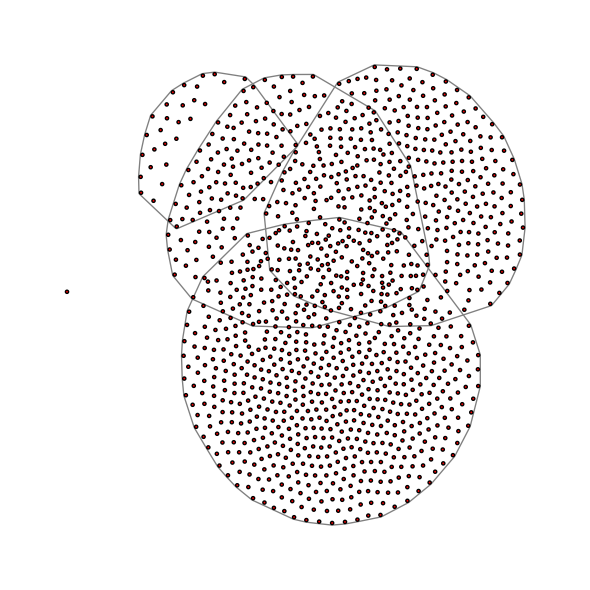

In [ ]:
HG = Hypergraph(1268, cluster_results)
dhg.visualization.draw_hypergraph(HG)